Below the date correponding to each attack, in order to select a particular .csv (avoid loading **HUGE** file)
```
Benign ['01/03/2018' '16/02/2018' '02/03/2018' '23/02/2018' '15/02/2018'
 '28/02/2018' '22/02/2018' '10/01/1970' '11/01/1970' '12/01/1970'
 '21/02/2018' '14/02/2018' '05/01/1970' '08/01/1970' '20/02/2018']
DDOS attack-HOIC ['21/02/2018']
DDoS attacks-LOIC-HTTP ['20/02/2018']
DoS attacks-Hulk ['16/02/2018']
Bot ['02/03/2018']
FTP-BruteForce ['14/02/2018']
SSH-Bruteforce ['14/02/2018']
Infilteration ['01/03/2018' '28/02/2018']
DoS attacks-SlowHTTPTest ['16/02/2018']
DoS attacks-GoldenEye ['15/02/2018']
DoS attacks-Slowloris ['15/02/2018']
DDOS attack-LOIC-UDP ['21/02/2018']
Brute Force -Web ['23/02/2018' '22/02/2018']
Brute Force -XSS ['23/02/2018' '22/02/2018']
SQL Injection ['23/02/2018' '22/02/2018']
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc,confusion_matrix,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.utils.np_utils import to_categorical

from sklearn.utils import class_weight
import glob

RANDOM_STATE_SEED = 77

2023-11-05 21:39:14.786835: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 21:39:15.800461: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


This preprocessing is the same as in the notebook containing DNN

In [2]:
# read the whole dataset just by leaving .csv 
all_files  = glob.glob("../DDOS/dataset/*20-02-2018*.csv") #selecte only DDOS attack on 20/02/2018
print(all_files)

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# display data
df

['../DDOS/dataset/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv']


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,20/02/2018 08:34:07,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:33:22,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:36:11,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:39:00,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:41:49,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948743,172.31.69.7-185.2.197.19-623-42801-6,185.2.197.19,42801,172.31.69.7,623,6,20/02/2018 01:41:45,94042,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948744,172.31.69.7-195.22.125.42-22-2178-6,195.22.125.42,2178,172.31.69.7,22,6,20/02/2018 11:51:06,251281,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948745,172.31.69.7-107.3.188.61-23-14259-6,107.3.188.61,14259,172.31.69.7,23,6,20/02/2018 08:49:20,21,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948746,172.31.69.7-5.188.11.188-3039-54193-6,5.188.11.188,54193,172.31.69.7,3039,6,20/02/2018 02:00:54,181954,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [3]:
def cleanDataset(df):
    
    print('Initial size was ', df.shape)
    # replace +ve and -ve infinity with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # drop missing values
    print('Now drop missing values')
    df.dropna(inplace=True)
    
    print('Dataset cleaned. Now shape is', df.shape)
    
cleanDataset(df)

Initial size was  (7948748, 84)
Now drop missing values
Dataset cleaned. Now shape is (7889295, 84)


In [4]:
df["Label"].value_counts()

Label
Benign                    7313104
DDoS attacks-LOIC-HTTP     576191
Name: count, dtype: int64

We just group under label "Malware" all type of attacks (some files contains different kind of attack)

In [5]:
listMalware = [label for label in df["Label"].value_counts().keys() if not 'Benign' in label ]
print(listMalware)
df.replace(to_replace=listMalware, value="Malware", inplace=True)

['DDoS attacks-LOIC-HTTP']


<Axes: title={'center': 'Event Label'}, xlabel='Label'>

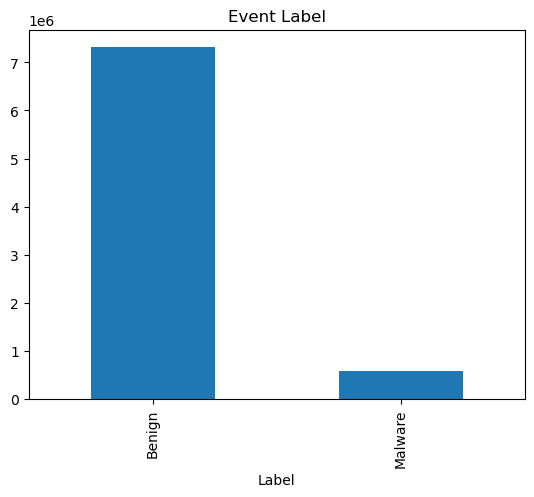

In [6]:
df["Label"].value_counts().plot(kind='bar',
                               y='Events',
                               title='Event Label'
                               )

# CNN approach


Let's create a dataset with the same label distribution

In [7]:
nSize = df[df["Label"] == "Malware"].shape[0]
print(nSize)
nSize=40000
df1 = df[df["Label"] == "Benign"][:nSize]
df2 = df[df["Label"] == "Malware"][:nSize]
df_final = pd.concat([ df1,df2], axis =0)
#We now encode our class labels to integer values for the model to use.

df_final.replace(to_replace="Benign", value=0, inplace=True)
df_final.replace(to_replace="Malware", value=1, inplace=True)
print(len(df_final))


576191
80000


In [8]:
train, test = train_test_split(df_final, test_size=0.2, random_state=RANDOM_STATE_SEED)


Get list of non numerical columns

In [9]:
objectColumns = list(df.select_dtypes(['object']).columns)
objectColumns.remove("Label")

print('Non numerical features (Skipping Label)', objectColumns)

numericColumns = df.select_dtypes(include=[np.number]).columns.to_list()

print(numericColumns)

print( 1 + len(numericColumns) + len(objectColumns), df.shape[1])

Non numerical features (Skipping Label) ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']
['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',

In [10]:
print("Full dataset:\n")
print("Benign: " + str(df_final["Label"].value_counts()[[0]].sum()))
print("Malware: " + str(df_final["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malware: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malware: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 40000
Malware: 40000
---------------
Training set:

Benign: 31924
Malware: 32076
---------------
Test set:

Benign: 8076
Malware: 7924


In [11]:
print(train.iloc[0].to_string())


Flow ID              172.31.64.118-216.58.198.70-49877-443-6
Src IP                                         172.31.64.118
Src Port                                               49877
Dst IP                                         216.58.198.70
Dst Port                                                 443
Protocol                                                   6
Timestamp                                20/02/2018 09:23:41
Flow Duration                                      117851571
Tot Fwd Pkts                                              32
Tot Bwd Pkts                                              48
TotLen Fwd Pkts                                       2629.0
TotLen Bwd Pkts                                      15812.0
Fwd Pkt Len Max                                        530.0
Fwd Pkt Len Min                                          0.0
Fwd Pkt Len Mean                                    82.15625
Fwd Pkt Len Std                                   116.348506
Bwd Pkt Len Max         

In [12]:

#remove object columns
train.drop(objectColumns, axis=1,inplace=True)
test.drop(objectColumns,axis=1,inplace=True)



In [13]:
#X after y, since we're slicing "Label" columns
y_train = np.array(train.pop("Label"))
X_train = train.values



y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
X_test = test.values

print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

print(type(X_test))
print(type(y_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(64000, 79)
(64000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(16000, 79)
(16000,)


In [14]:
a = to_categorical(y_test, num_classes=2)
print(a.shape)

(16000, 2)


In [15]:
# reshape the data for CNN
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
print(X_train.shape, X_test.shape)

#categorize y_train
yTrain = to_categorical(y_train, num_classes=2)
yTest = to_categorical(y_test, num_classes=2)
print(yTrain.shape, yTest.shape)

(64000, 79, 1) (16000, 79, 1)
(64000, 2) (16000, 2)


A Convolution Neural Network Model.


Model with Conv1D layers, barch normalization and max pooling 1D

In [16]:
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

# making the deep learning function
def CNN_model(initial_input_shape):
    
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=initial_input_shape))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=initial_input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=initial_input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model    



In [17]:

CNN = CNN_model(X_train.shape[1:])

2023-11-05 21:41:39.495051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30936 MB memory:  -> device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:21:00.0, compute capability: 7.0
2023-11-05 21:41:39.495666: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 30936 MB memory:  -> device: 1, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:81:00.0, compute capability: 7.0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 79, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 79, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 40, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 40, 64)           256       
 hNormalization)                                                 
                                                        

In [18]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(verbose=True, patience=20, monitor='val_loss')
logger = CSVLogger('log_CNN.csv', append=True)
callback_ES = [early_stop, logger]

In [19]:
history_CNN = CNN.fit(X_train, yTrain, epochs=100, batch_size=32, 
          validation_data=(X_test, yTest), callbacks=callback_ES)

Epoch 1/100


2023-11-05 21:41:47.360227: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-11-05 21:41:47.811681: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x14d98d71e840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-05 21:41:47.811717: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100S-PCIE-32GB, Compute Capability 7.0
2023-11-05 21:41:47.811722: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (1): Tesla V100S-PCIE-32GB, Compute Capability 7.0
2023-11-05 21:41:47.815673: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-05 21:41:47.932791: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2000/2000 [==============================] - 11s 4ms/step - loss: 0.0365 - accuracy: 0.9908 - val_loss: 0.0149 - val_accuracy: 0.9980
Epoch 2/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0144 - accuracy: 0.9961 - val_loss: 0.0099 - val_accuracy: 0.9967
Epoch 3/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 4/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0114 - accuracy: 0.9975 - val_loss: 0.0102 - val_accuracy: 0.9946
Epoch 5/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 6/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.0092 - val_accuracy: 0.9972
Epoch 7/100
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.3477 - val_accuracy: 0.7

In [20]:
# check the model performance on test data
scores = CNN.evaluate(X_test, yTest)
print("%s: %.2f%%" % (CNN.metrics_names[1], scores[1] * 100))


500/500 [==============================] - 1s 1ms/step - loss: 2.1234e-09 - accuracy: 1.0000
accuracy: 100.00%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


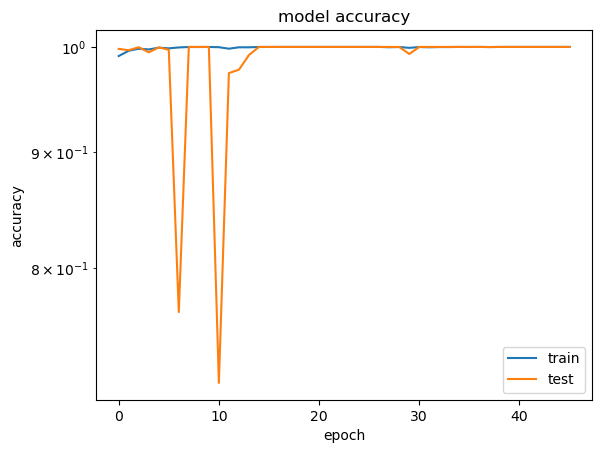

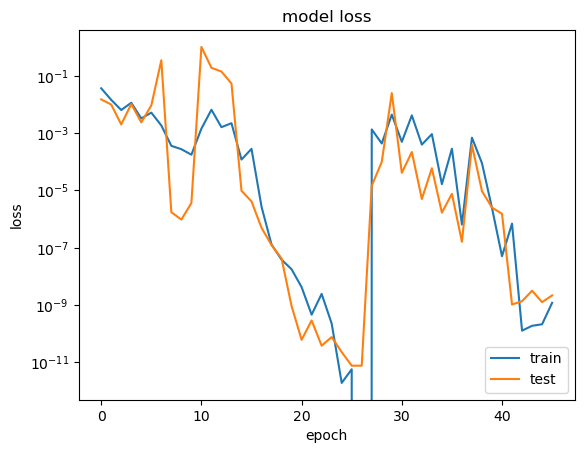

In [24]:
# list all data in history
print(history_CNN.history.keys())
# summarize history for accuracy
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.yscale('log')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.yscale('log')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()